<a href="https://colab.research.google.com/github/esha20/Python/blob/main/MNIST_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from tensorflow import keras
from keras import layers
from keras import models
from keras.layers import *

In [41]:
import matplotlib.pyplot as plt

In [42]:
n=keras.datasets.mnist

In [43]:
(train,target_train),(test,target_test)=n.load_data()

In [44]:
train.shape   #channel is missing

(60000, 28, 28)

In [45]:
train=train.reshape(60000,28,28,1)

In [46]:
train.shape     #adding channel by reshaping 

(60000, 28, 28, 1)

In [47]:
test.shape    #channel is missing(greyscale/color)

(10000, 28, 28)

In [48]:
test=test.reshape(10000,28,28,1)    #adding channel by reshaping

In [49]:
test.shape

(10000, 28, 28, 1)

In [50]:
model=models.Sequential()     #defines that the model is sequential
model.add(Conv2D(64, kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))      #adding a convolutional layer
model.add(MaxPool2D())      #we may or maynot consider the poolsize here . The default poolsize is (2,2).
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 256)       

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(128,activation='relu'))    #parameters are no. of neurons and activation layers
model.add(Dense(64,activation='relu'))

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 256)       

In [55]:
model.add(Dense(10,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 256)       

In [57]:
#parameters are things that the machine can learn. In pooling the trainable parameters are 0.
#no of parameters are calculated like = (input channel*(kernel_size)+1)*output size


#for first layer = (1*(5*5)+1)*64 = 1664

#for second layer = (64*(3*3)+1)*128 = 73856
# for second layer the input size is the output size of the first layer

In [58]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [59]:
#here we use sparse_categorical_crossentropy instead of binary_crossentropy because binary is when the output has only two values.

In [61]:
h=model.fit(train,target_train,epochs=10,validation_data=(test,target_test))

Epoch 1/10
1875/1875 [==============================] - 174s 93ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 174s 93ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 173s 92ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 172s 92ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 174s 93ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 173s 92ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 172s 91ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
18

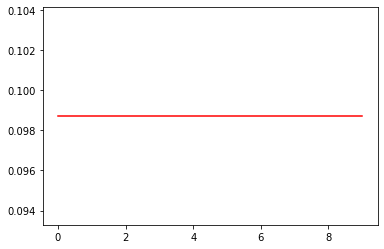

In [62]:
h.history.keys()
ac=h.history['accuracy']
lo=h.history['loss']
plt.plot(ac,'r-')
plt.plot(lo,'b-')